In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline

In [11]:
df = pd.read_csv(r'C:\Users\jorda\Desktop\Dissertation\Dissertation Code\df.csv')
df.head()

,Unnamed: 0,year,manufacturer,model,description,euro_standard,engine_capacity,urban_metric,extra_urban_metric,co2,co,fuel_12k_miles,transmission,fueltype
0,0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,1600,11.1,6.5,195,980,1236,0,0
1,1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0
2,2,2000,Alfa Romeo,145 Range,Cloverleaf,2,2000,12.4,6.6,210,1103,1326,0,0
3,3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,1600,11.3,6.6,195,980,1252,0,0
4,4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0


In [12]:
df = df.drop(columns = {'Unnamed: 0'})

In [6]:
df.columns

Index(['year', 'manufacturer', 'model', 'description', 'euro_standard',
       'engine_capacity', 'urban_metric', 'extra_urban_metric', 'co2', 'co',
       'fuel_12k_miles', 'transmission', 'fueltype'],
      dtype='object')

<AxesSubplot:xlabel='engine_capacity'>

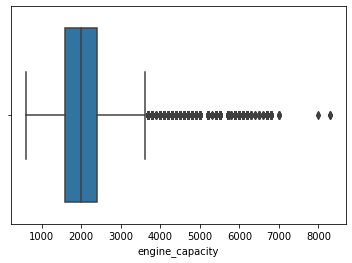

In [7]:
#Finding any potential outliers
sns.boxplot(x=df['engine_capacity'])

<AxesSubplot:xlabel='urban_metric'>

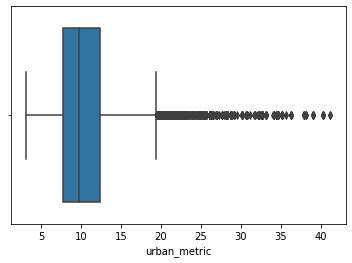

In [8]:
sns.boxplot(x=df['urban_metric'])

<AxesSubplot:xlabel='extra_urban_metric'>

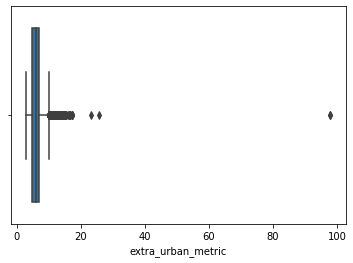

In [9]:
sns.boxplot(x=df['extra_urban_metric'])

<AxesSubplot:xlabel='co2'>

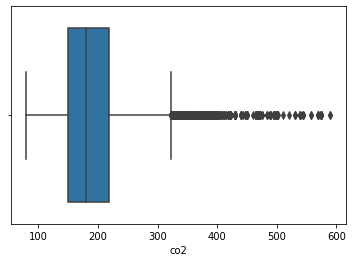

In [10]:
sns.boxplot(x=df['co2'])

<AxesSubplot:xlabel='co'>

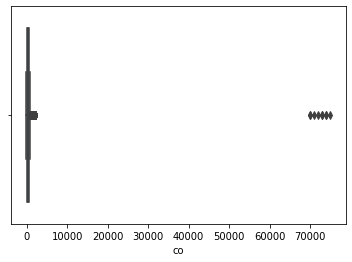

In [11]:
sns.boxplot(x=df['co'])

<AxesSubplot:xlabel='fuel_12k_miles'>

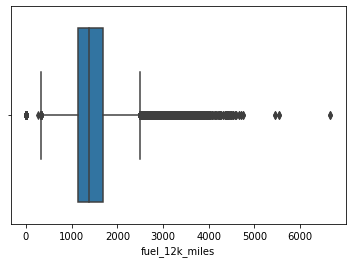

In [12]:
sns.boxplot(x=df['fuel_12k_miles'])

In [13]:
outlier1 = (np.where(df['extra_urban_metric'] > 20))
outlier2 = (np.where(df['co'] > 10000))
outlier3 = (np.where(df['co'] < 0))
outlier4 = (np.where(df['fuel_12k_miles'] > 5000))

print('Outlier for Urban metric in rows: ',outlier1,'\n'
      'Outlier for CO Emissions in rows: ',outlier2,'\n'
      'Outlier for CO Emissions in rows: ',outlier3,'\n'
      'Outlier for Fuel 12k miles in rows: ', outlier4)

Outlier for Urban metric in rows:  (array([ 8379, 11353, 19822, 19823], dtype=int64),) 
Outlier for CO Emissions in rows:  (array([11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978],
      dtype=int64),) 
Outlier for CO Emissions in rows:  (array([11208], dtype=int64),) 
Outlier for Fuel 12k miles in rows:  (array([ 8379, 11353, 34926, 34927, 34928, 34929], dtype=int64),)


In [14]:
df = df.drop([8379, 11353, 19822, 19823, 11970, 11971, 11972, 11973, 11974, 11975, 11976, 11977, 11978, 11208, 8379,
                  11353, 34926, 34927, 34928, 34929])

In [15]:
df.head()

,year,manufacturer,model,description,euro_standard,engine_capacity,urban_metric,extra_urban_metric,co2,co,fuel_12k_miles,transmission,fueltype
0,2000,Alfa Romeo,145 Range,1.6 Twin Spark 16v,2,1600,11.1,6.5,195,980,1236,0,0
1,2000,Alfa Romeo,145 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0
2,2000,Alfa Romeo,145 Range,Cloverleaf,2,2000,12.4,6.6,210,1103,1326,0,0
3,2000,Alfa Romeo,146 Range,1.6 Twin Spark 16v,2,1600,11.3,6.6,195,980,1252,0,0
4,2000,Alfa Romeo,146 Range,1.8 Twin Spark 16v,2,1700,11.5,6.6,200,1105,1266,0,0


In [16]:
df['engine_capacity'].describe()

count    44679.000000
mean      2181.069406
std        887.130236
min        600.000000
25%       1600.000000
50%       2000.000000
75%       2400.000000
max       8300.000000
Name: engine_capacity, dtype: float64

In [17]:
df['urban_metric'].describe()

count    44679.000000
mean        10.453728
std          3.906202
min          3.100000
25%          7.700000
50%          9.800000
75%         12.400000
max         41.200000
Name: urban_metric, dtype: float64

In [18]:
df['extra_urban_metric'].describe()

count    44679.000000
mean         6.129367
std          1.646910
min          2.900000
25%          4.900000
50%          5.900000
75%          7.000000
max         17.400000
Name: extra_urban_metric, dtype: float64

In [19]:
df['co2'].describe()

count    44679.000000
mean       189.386871
std         55.813336
min         79.000000
25%        150.000000
50%        180.000000
75%        218.000000
max        590.000000
Name: co2, dtype: float64

In [20]:
df['co'].describe()

count    44679.000000
mean       361.344726
std        255.708280
min          0.000000
25%        189.000000
50%        302.000000
75%        480.000000
max       2100.000000
Name: co, dtype: float64

In [21]:
df['fuel_12k_miles'].describe()

count    44679.000000
mean      1459.289196
std        497.834597
min          0.000000
25%       1142.000000
50%       1376.000000
75%       1680.000000
max       4739.000000
Name: fuel_12k_miles, dtype: float64

In [22]:
print("engine_capacity Skewness: %f" % df['engine_capacity'].skew())
print("engine_capacity Kurtosis: %f" % df['engine_capacity'].kurt())

print("urban_metric Skewness: %f" % df['urban_metric'].skew())
print("urban_metric Kurtosis: %f" % df['urban_metric'].kurt())

print("extra_urban_metric Skewness: %f" % df['extra_urban_metric'].skew())
print("extra_urban_metric Kurtosis: %f" % df['extra_urban_metric'].kurt())

print("co2 Skewness: %f" % df['co2'].skew())
print("co2 Kurtosis: %f" % df['co2'].kurt())

print("co Skewness: %f" % df['co'].skew())
print("co Kurtosis: %f" % df['co'].kurt())

print("fuel_12k_miles Skewness: %f" % df['fuel_12k_miles'].skew())
print("fuel_12k_miles Kurtosis: %f" % df['fuel_12k_miles'].kurt())

engine_capacity Skewness: 2.116593
engine_capacity Kurtosis: 5.868717
urban_metric Skewness: 1.455828
urban_metric Kurtosis: 4.175552
extra_urban_metric Skewness: 1.216683
extra_urban_metric Kurtosis: 2.874002
co2 Skewness: 1.336383
co2 Kurtosis: 3.490534
co Skewness: 1.653410
co Kurtosis: 4.557298
fuel_12k_miles Skewness: 1.501251
fuel_12k_miles Kurtosis: 4.631314


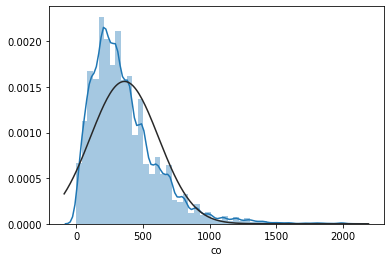

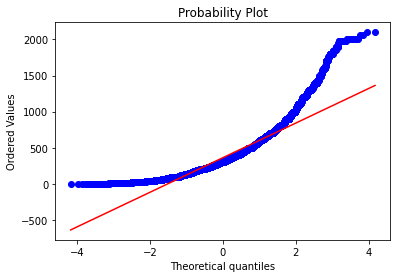

In [23]:
#Histogram & normal distribution probability plot
#Histogram - Kurtosis and skewness.
#Normal probability plot - Data distribution should closely follow the diagonal that represents the normal distribution.
#Ok, 'co2' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line.
#But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you
#can learn in statistical books: in case of positive skewness, log transformations usually works well.
#When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.
sns.distplot(df['co'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['co'], plot=plt)

In [24]:
df['co'] = df['co'] +1
df['fuel_12k_miles'] = df['fuel_12k_miles'] +1

In [35]:
#using co22 instead of co2 to compare the difference when analysing
df['co22'] = np.log(df['co2'])

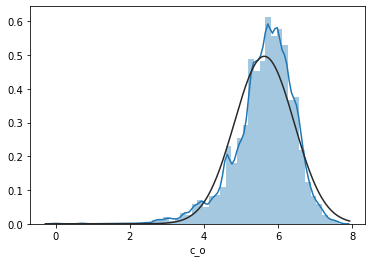

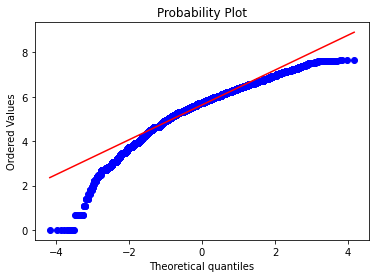

In [29]:
sns.distplot(df['c_o'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['c_o'], plot=plt)

In [37]:
#Logarithm skewness and kurtosis
print("engine_capacity Skewness: %f" % df['ec'].skew())
print("engine_capacity Kurtosis: %f" % df['ec'].kurt())

print("urban_metric Skewness: %f" % df['um'].skew())
print("urban_metric Kurtosis: %f" % df['um'].kurt())

print("co2 Skewness: %f" % df['co22'].skew())
print("co2 Kurtosis: %f" % df['co22'].kurt())

print("Extra_urban_metric Skewness: %f" % df['eum'].skew())
print("Extra_urban_metric Kurtosis: %f" % df['eum'].kurt())

print("co Skewness: %f" % df['c_o'].skew())
print("co Kurtosis: %f" % df['c_o'].kurt())

print("fuel_12k_miles Skewness: %f" % df['f12km'].skew())
print("fuel_12k_miles Kurtosis: %f" % df['f12km'].kurt())

engine_capacity Skewness: 0.596593
engine_capacity Kurtosis: 1.452062
urban_metric Skewness: 0.190269
urban_metric Kurtosis: 0.014755
co2 Skewness: 0.312661
co2 Kurtosis: 0.174094
Extra_urban_metric Skewness: 0.312229
Extra_urban_metric Kurtosis: 0.103218
co Skewness: -0.990381
co Kurtosis: 2.352337
fuel_12k_miles Skewness: -6.478495
fuel_12k_miles Kurtosis: 114.959517


C:\anaconda\lib\site-packages\numpy\lib\function_base.py:2487: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


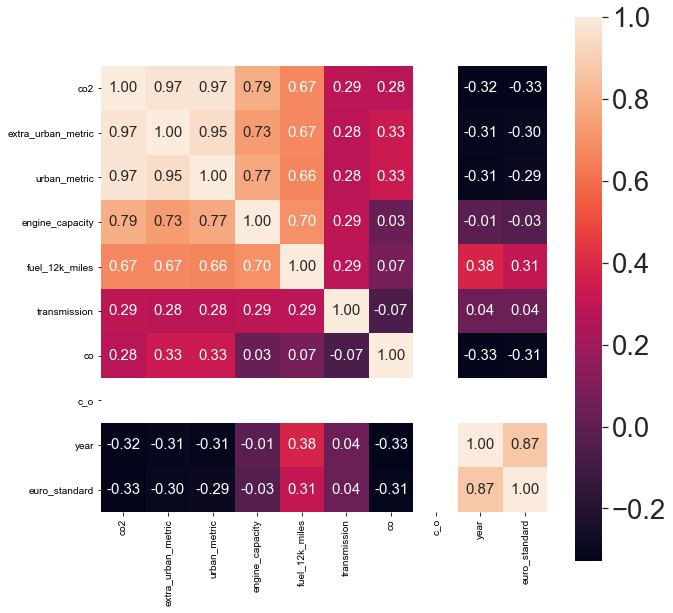

In [24]:
k = 10 #number of variables for heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 10))
cols = corrmat.nlargest(k, 'co2')['co2'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=2.5)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

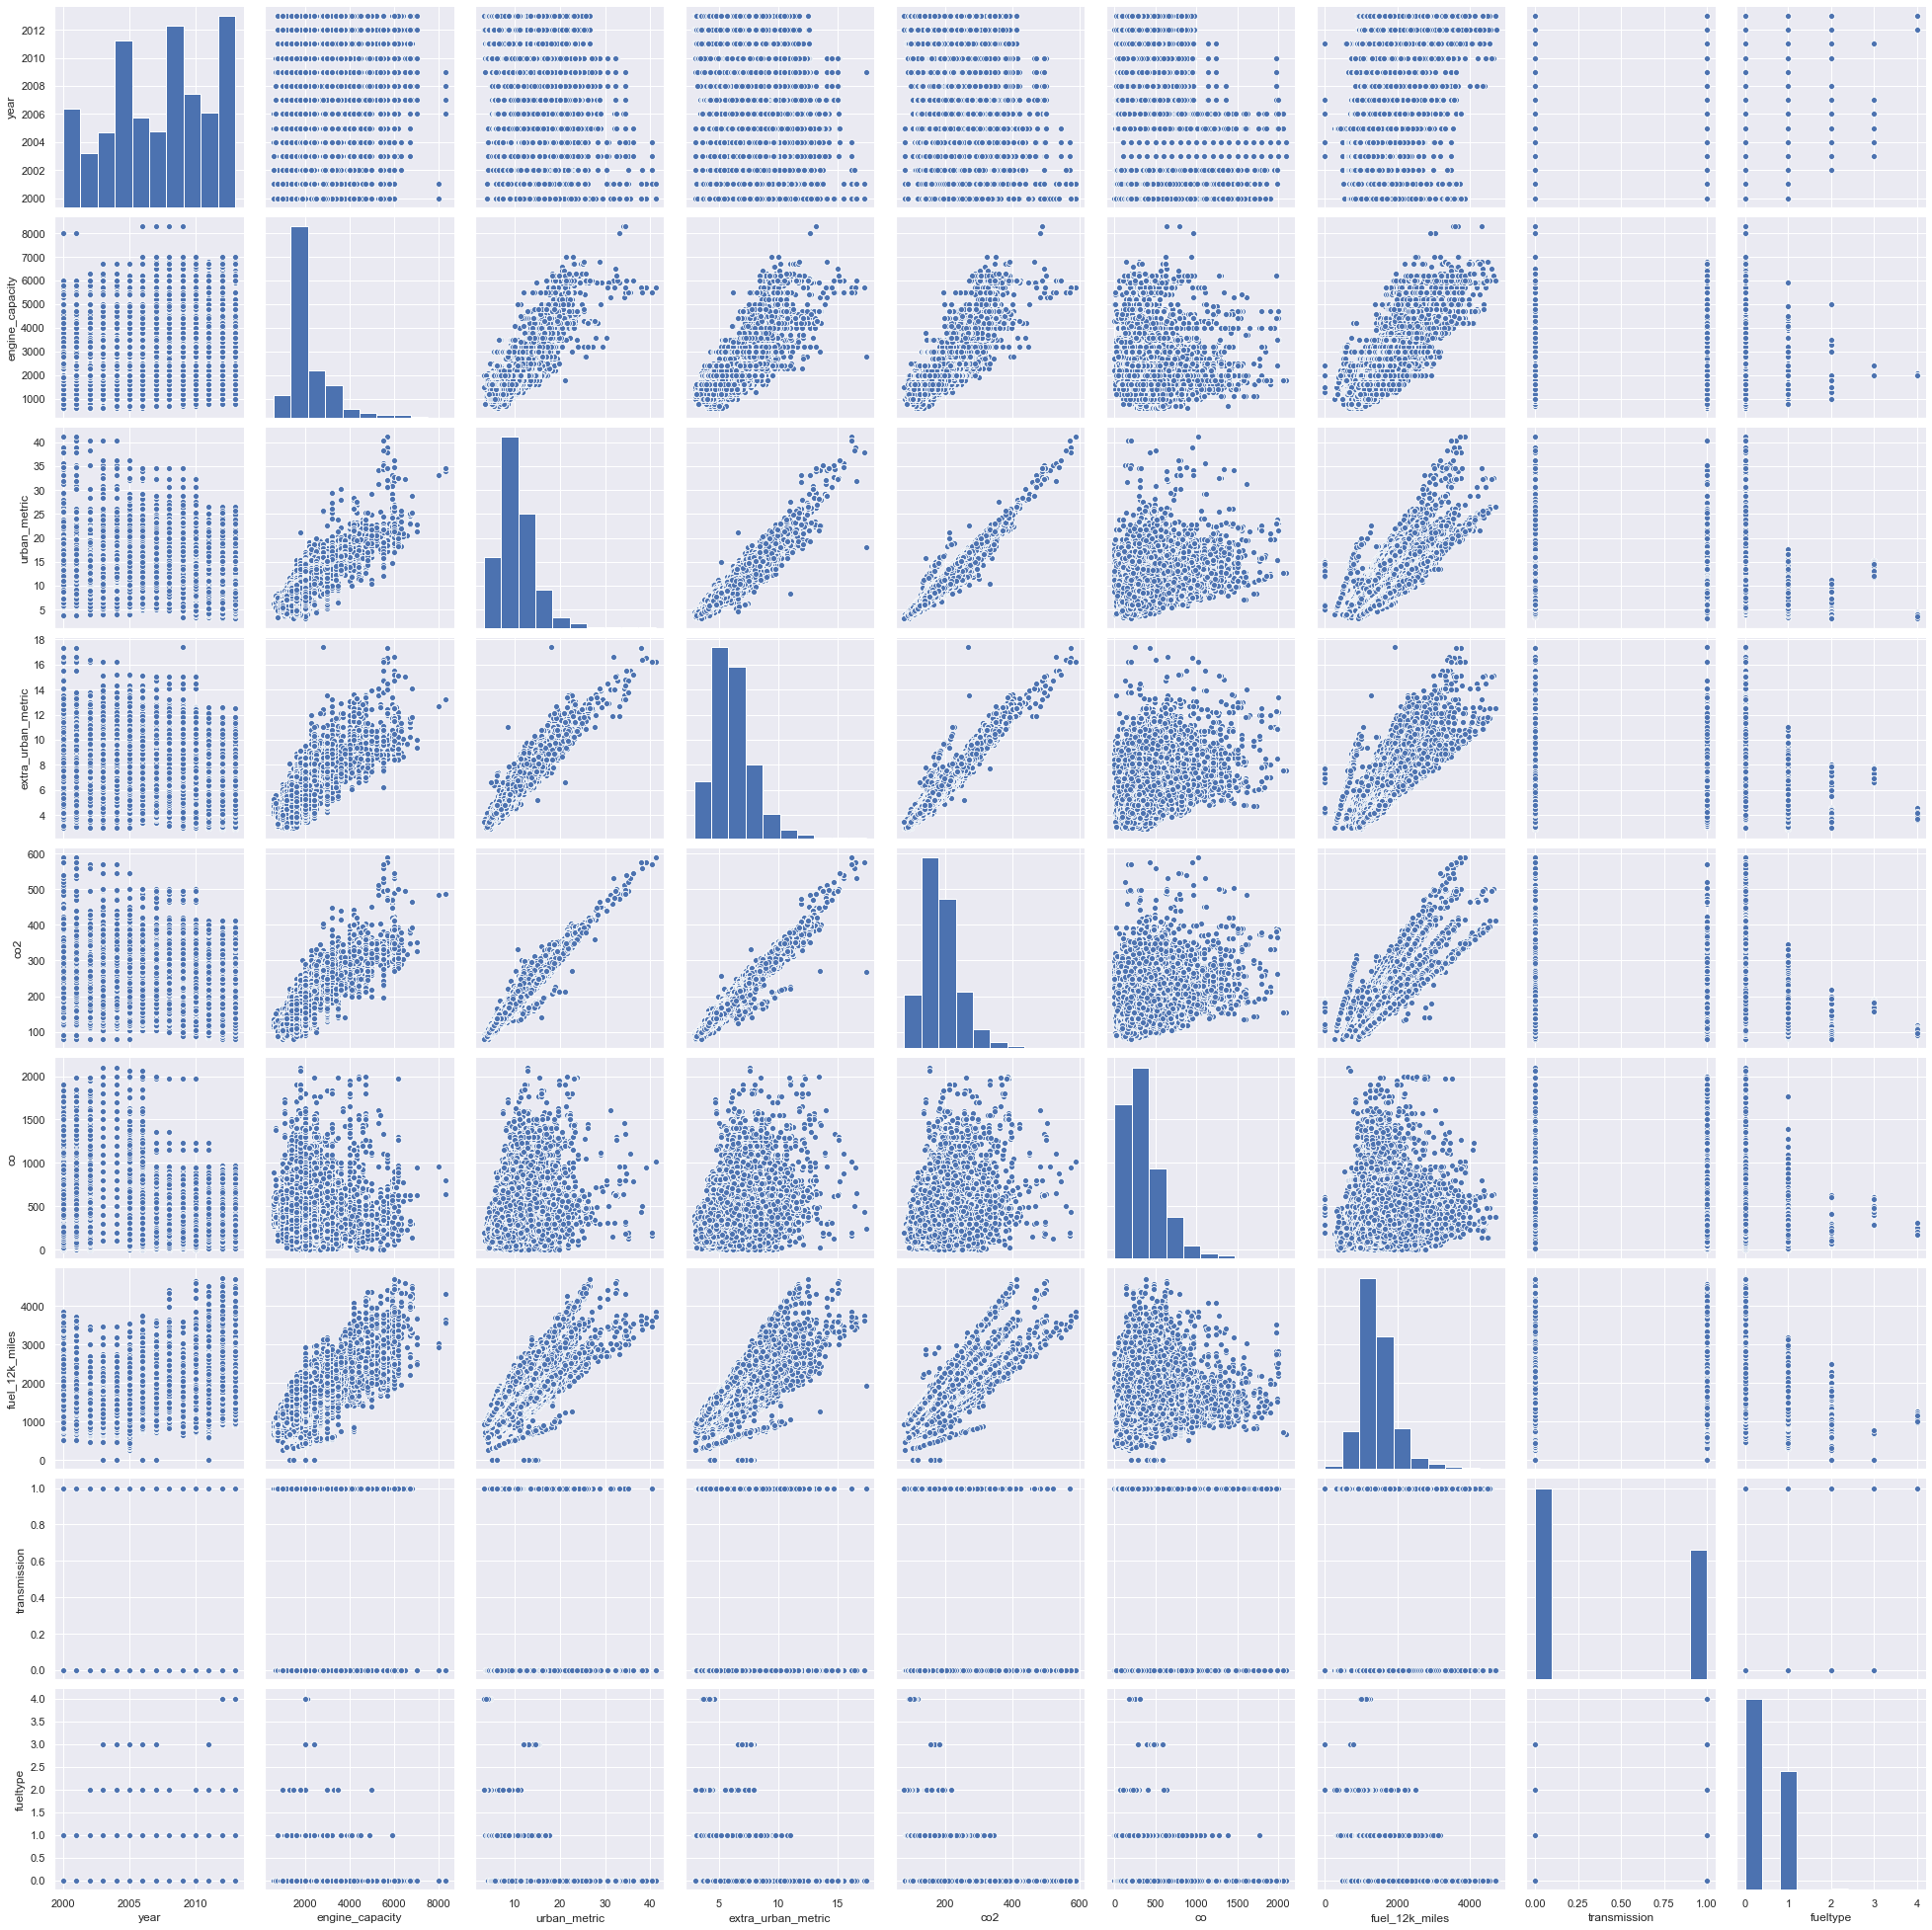

In [25]:
sns.set()
cols = ['year', 'manufacturer', 'model', 'description', 'engine_capacity', 'urban_metric', 'extra_urban_metric', 'co2', 'co',
        'fuel_12k_miles', 'transmission', 'fueltype']
sns.pairplot(df[cols], height = 3)
plt.show();

In [26]:
df.to_csv('data_cleaned_and_Explored.csv')